# 从0开始学习Pytorch

## 0、环境检查

In [1]:
# 环境检查脚本
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt

# 1. Python版本
print(f"\n Python版本: {sys.version.split()[0]}")

# 2. PyTorch版本
print(f" PyTorch版本: {torch.__version__}")

# 3. CUDA是否可用
cuda_available = torch.cuda.is_available()
if cuda_available:
    print(f" CUDA可用: {torch.version.cuda}")
    print(f"   GPU设备: {torch.cuda.get_device_name(0)}")
    print(f"   GPU数量: {torch.cuda.device_count()}")
else:
    print("  CUDA不可用，将使用CPU训练（速度较慢）")

# 4. NumPy版本
print(f" NumPy版本: {np.__version__}")

# 5. Matplotlib版本
print(f" Matplotlib版本: {plt.matplotlib.__version__}")

# 6. 创建一个测试张量
test_tensor = torch.randn(3, 3)
print(f"\n 测试张量创建成功:")
print(test_tensor)

print("\n" + "="*50)
print(" 环境检查完成！可以开始学习了！")
print("="*50)



 Python版本: 3.10.19
 PyTorch版本: 2.7.1+cu128
 CUDA可用: 12.8
   GPU设备: NVIDIA GeForce RTX 5060 Laptop GPU
   GPU数量: 1
 NumPy版本: 2.2.6
 Matplotlib版本: 3.10.7

 测试张量创建成功:
tensor([[ 0.3129, -0.4961,  0.2063],
        [-0.3757, -2.9460,  0.8908],
        [ 0.7951,  1.3650,  0.3979]])

 环境检查完成！可以开始学习了！


## 1、张量基础

In [2]:
# 0维：一个数字
scaler = torch.tensor(3.14)
print(f"标量:{scaler},形状:{scaler.shape},维度：{scaler.ndim}")
# 1维：一个向量
vector = torch.tensor([1, 2, 3,4])
print(f"向量:{vector},形状:{vector.shape},维度：{vector.ndim}")
# 2维：一个矩阵
matrix = torch.tensor([[1, 2, 3], 
                       [4, 5, 6]])
print(f"矩阵:{matrix},形状:{matrix.shape},维度：{matrix.ndim}")
# 3维：彩色图像
image = torch.randn(3,256,256)
print(f"彩色图像:{image},形状:{image.shape},维度：{image.ndim}")
# 4维：一批彩色图像
batch_of_images = torch.randn(10,3,256,256)
print(f"一批彩色图像:{batch_of_images},形状:{batch_of_images.shape},维度：{batch_of_images.ndim}")


标量:3.140000104904175,形状:torch.Size([]),维度：0
向量:tensor([1, 2, 3, 4]),形状:torch.Size([4]),维度：1
矩阵:tensor([[1, 2, 3],
        [4, 5, 6]]),形状:torch.Size([2, 3]),维度：2
彩色图像:tensor([[[ 1.3291, -1.5916, -0.0188,  ...,  0.9167,  1.1628,  1.3900],
         [ 0.6288,  0.2192,  1.0540,  ..., -1.4661,  0.9765, -0.7798],
         [ 1.4632, -0.1681, -0.2752,  ..., -1.9963, -0.2077,  1.8759],
         ...,
         [ 0.9604,  0.3285, -0.0747,  ..., -0.8305, -0.5924,  0.3738],
         [-1.7844, -0.9726, -0.5530,  ..., -0.0757,  0.9486, -0.0662],
         [ 0.7770,  0.8754, -0.2338,  ...,  0.2128,  0.1017,  1.2388]],

        [[-0.8028, -1.6235,  0.8076,  ...,  0.9835, -0.0434, -0.5129],
         [-0.8100,  0.9089, -0.1280,  ...,  0.9527, -0.5135,  0.4158],
         [ 0.7836, -0.4682, -1.0319,  ..., -0.0850, -1.3400, -0.4382],
         ...,
         [-0.3017,  0.2907, -1.3843,  ..., -1.0682,  0.4604,  0.7218],
         [ 1.5609, -1.5547,  0.9397,  ..., -0.5047,  0.5372,  1.1314],
         [-0.8486, -0.4

In [5]:
# 1. 全零张量 - 常用于初始化
zeros = torch.zeros(3, 4)  
print(zeros)

# 2. 全一张量
ones = torch.ones(2, 3)
print(ones)

# 3. 单位矩阵（对角线为1，其余为0）
eye = torch.eye(3)
print(eye)

# 4. 填充指定值
full_tensor = torch.full((2, 3), 7.5)
print(full_tensor)

# 5. 空张量（未初始化，内存随机值）
empty = torch.empty(2, 3)
print(empty)

# 6. 均匀分布 [0, 1)
rand = torch.rand(2, 3)
print(rand)

# 7. 标准正态分布 N(0, 1)
randn = torch.randn(2, 3)
print(randn)

# 8. 随机整数
randint = torch.randint(0, 10, (2, 3))  # [0, 10)
print(randint)

# 9. 随机排列
randperm = torch.randperm(10)

# 10. 控制随机种子（重要！保证可复现）
torch.manual_seed(42)
r1 = torch.randn(2, 2)
print(r1)
torch.manual_seed(42)  # 重置相同种子
r2 = torch.randn(2, 2)
print(r2)


tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
tensor([[7.5000, 7.5000, 7.5000],
        [7.5000, 7.5000, 7.5000]])
tensor([[-0.0411, -0.4692,  0.2528],
        [-0.5812, -1.7161, -0.1346]])
tensor([[0.9408, 0.1332, 0.9346],
        [0.5936, 0.8694, 0.5677]])
tensor([[ 0.3765, -0.1808,  0.3930],
        [ 0.4327, -1.3627,  1.3564]])
tensor([[1, 9, 7],
        [9, 2, 0]])
tensor([[0.3367, 0.1288],
        [0.2345, 0.2303]])
tensor([[0.3367, 0.1288],
        [0.2345, 0.2303]])


In [9]:
A =torch.tensor([[1.0,2.0,3.0],
                [4.0,5.0,6.0]])
B = torch.tensor([[7.0,8.0],
                  [9.0,10.0],
                  [11.0,12.0]])
print(torch.mm(A,B))
print(A@B)
print(A.matmul(B))

tensor([[ 58.,  64.],
        [139., 154.]])
tensor([[ 58.,  64.],
        [139., 154.]])
tensor([[ 58.,  64.],
        [139., 154.]])


In [10]:
# numpy to tensor
n = np.array([1,2,3])
t = torch.from_numpy(n)
print(f"Numpy: {n}")
print(f"Tensor: {t}")

Numpy: [1 2 3]
Tensor: tensor([1, 2, 3])


## 2、自动求导（Autograd）

In [12]:
X = torch.tensor([2.0],requires_grad =True)
#计算图示例
Y = X **2
Z = 2*Y + 3
Z.backward()
print(X.grad)


tensor([8.])


In [13]:
x = torch.tensor([2.0], requires_grad=True)
w = torch.tensor([3.0], requires_grad=True)
b = torch.tensor([1.0], requires_grad=True)

# 前向传播
y = w * x + b     
z = y ** 2       

print(f"前向传播: x={x.item()}, w={w.item()}, b={b.item()}")
print(f"y = {y.item()}, z = {z.item()}")

# 反向传播
z.backward()

print(f"\n反向传播:")
print(f"dz/dx = {x.grad.item()}")  # dz/dx = dz/dy * dy/dx = 2y * w = 2*7*3 = 42
print(f"dz/dw = {w.grad.item()}")  # dz/dw = dz/dy * dy/dw = 2y * x = 2*7*2 = 28
print(f"dz/db = {b.grad.item()}")  # dz/db = dz/dy * dy/db = 2y * 1 = 14


前向传播: x=2.0, w=3.0, b=1.0
y = 7.0, z = 49.0

反向传播:
dz/dx = 42.0
dz/dw = 28.0
dz/db = 14.0


In [16]:
##  不需要梯度的情况
#方法1：with torch.no_grad()
x = torch.tensor([1.0], requires_grad=True)

with torch.no_grad():
    y = x * 2
    print(f"y.requires_grad: {y.requires_grad}")  # False

x = torch.tensor([1.0], requires_grad=True)
y = x * 2
y_detached = y.detach()  # 从计算图中分离
print(f"y.requires_grad: {y.requires_grad}")  # True
print(f"y_detached.requires_grad: {y_detached.requires_grad}")  # False

#方法3：@torch.no_grad() 装饰器 
@torch.no_grad()
def evaluate(model, x):
    return model(x)  # 推理时不需要计算梯度



y.requires_grad: False
y.requires_grad: True
y_detached.requires_grad: False


## 3、进阶技巧

In [18]:
import torch
import time

# 性能对比
def compare_device_speed():
    print("="*70)
    print(" CPU vs GPU 性能对比")
    print("="*70)
    
    # 创建大矩阵
    size = 5000
    
    # CPU计算
    a_cpu = torch.randn(size, size)
    b_cpu = torch.randn(size, size)
    
    start = time.time()
    c_cpu = torch.mm(a_cpu, b_cpu)
    cpu_time = time.time() - start
    print(f"\n CPU时间: {cpu_time:.4f} 秒")
    
    # GPU计算（如果可用）
    if torch.cuda.is_available():
        a_gpu = a_cpu.to('cuda')
        b_gpu = b_cpu.to('cuda')
        
        # 预热
        torch.mm(a_gpu, b_gpu)
        torch.cuda.synchronize()
        
        start = time.time()
        c_gpu = torch.mm(a_gpu, b_gpu)
        torch.cuda.synchronize()  # 等待GPU完成
        gpu_time = time.time() - start
        
        print(f" GPU时间: {gpu_time:.4f} 秒")
        print(f"\n 加速比: {cpu_time/gpu_time:.2f}x")
    else:
        print("⚠️  CUDA不可用，无法进行GPU测试")

compare_device_speed()


 CPU vs GPU 性能对比

 CPU时间: 0.4835 秒
 GPU时间: 0.0260 秒

 加速比: 18.60x


In [19]:
print("\n" + "="*70)
print(" 内存优化技巧")
print("="*70)

#  错误：不清零梯度（内存累积）
def bad_training_loop():
    x = torch.randn(1000, 100, requires_grad=True)
    for i in range(100):
        y = (x ** 2).sum()
        y.backward()
        # 忘记清零梯度！
    print(f"梯度值: {x.grad[0, 0]}")  # 会很大！

#  正确：及时清零梯度
def good_training_loop():
    x = torch.randn(1000, 100, requires_grad=True)
    for i in range(100):
        y = (x ** 2).sum()
        y.backward()
        x.grad.zero_()  # 清零
    print(f"梯度值: {x.grad[0, 0]}")

#  推理时禁用梯度（节省内存）
@torch.no_grad()
def inference(model, x):
    return model(x)

#  使用 detach 分离计算图
x = torch.randn(10, requires_grad=True)
y = x * 2
z = y.detach()  # z 不再跟踪梯度

print("\n 内存优化要点:")
print("  1. 训练时：及时 grad.zero_()")
print("  2. 推理时：使用 @torch.no_grad()")
print("  3. 中间结果：使用 detach()")
print("  4. 大批次：考虑梯度累积")



 内存优化技巧

 内存优化要点:
  1. 训练时：及时 grad.zero_()
  2. 推理时：使用 @torch.no_grad()
  3. 中间结果：使用 detach()
  4. 大批次：考虑梯度累积


## 4、🚀实战练习

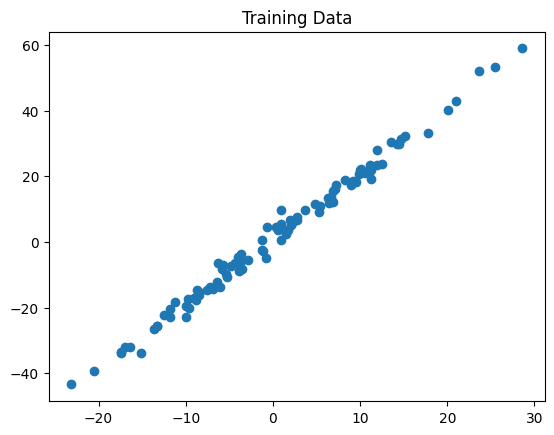

epoch[20/1000],Loss:4.3804,w:1.9864,b:0.4728
epoch[40/1000],Loss:4.3251,w:1.9969,b:0.4988
epoch[60/1000],Loss:4.2938,w:1.9968,b:0.5238
epoch[80/1000],Loss:4.2650,w:1.9966,b:0.5477
epoch[100/1000],Loss:4.2383,w:1.9965,b:0.5708
epoch[120/1000],Loss:4.2137,w:1.9964,b:0.5929
epoch[140/1000],Loss:4.1910,w:1.9962,b:0.6142
epoch[160/1000],Loss:4.1700,w:1.9961,b:0.6347
epoch[180/1000],Loss:4.1506,w:1.9960,b:0.6543
epoch[200/1000],Loss:4.1328,w:1.9959,b:0.6732
epoch[220/1000],Loss:4.1162,w:1.9958,b:0.6914
epoch[240/1000],Loss:4.1010,w:1.9957,b:0.7088
epoch[260/1000],Loss:4.0869,w:1.9956,b:0.7255
epoch[280/1000],Loss:4.0739,w:1.9955,b:0.7416
epoch[300/1000],Loss:4.0619,w:1.9954,b:0.7571
epoch[320/1000],Loss:4.0508,w:1.9953,b:0.7720
epoch[340/1000],Loss:4.0406,w:1.9952,b:0.7863
epoch[360/1000],Loss:4.0312,w:1.9951,b:0.8000
epoch[380/1000],Loss:4.0224,w:1.9951,b:0.8132
epoch[400/1000],Loss:4.0144,w:1.9950,b:0.8258
epoch[420/1000],Loss:4.0069,w:1.9949,b:0.8380
epoch[440/1000],Loss:4.0001,w:1.9948,b

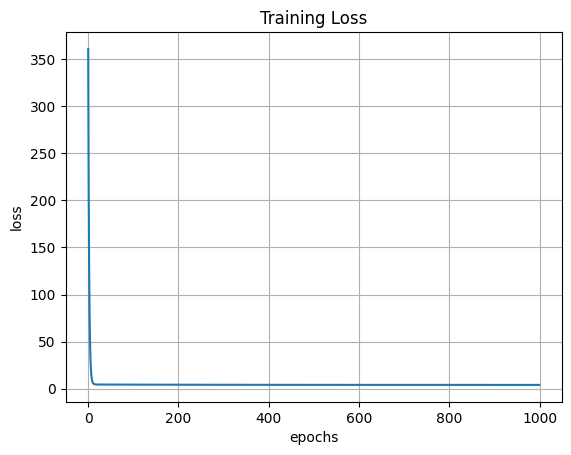

In [22]:
#从0-1 pytorch实现线性回归
import torch 
import matplotlib.pyplot as plt
x = torch.randn(100,1)*10
y = 2*x+1 +torch.randn(100,1)*2
plt.scatter(x,y)
plt.title("Training Data")
plt.show()

w =torch.randn(1,requires_grad = True)
b = torch.randn(1,requires_grad = True)

def forword(x):
    return x*w+b
def loss_fn(y_pred,y_true):
    return((y_pred-y_true)**2).mean()

lr = 0.001
epochs = 1000
losses = []
for epoch in range(epochs):
    y_pred = forword(x)
    loss = loss_fn(y_pred,y)
    loss.backward()

    with torch.no_grad():
        w -=lr*w.grad
        b -=lr*b.grad
        w.grad.zero_()  
        b.grad.zero_()
    losses.append(loss.item())
    
    if (epoch+1)%20 ==0:
        print(f"epoch[{epoch+1}/{epochs}],Loss:{loss.item():.4f},w:{w.item():.4f},b:{b.item():.4f}")
plt.plot(losses)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Training Loss")
plt.grid(True)
plt.show()

真实参数: a=2, b=3, c=1
学到的参数: a=2.0042, b=2.9956, c=1.0123


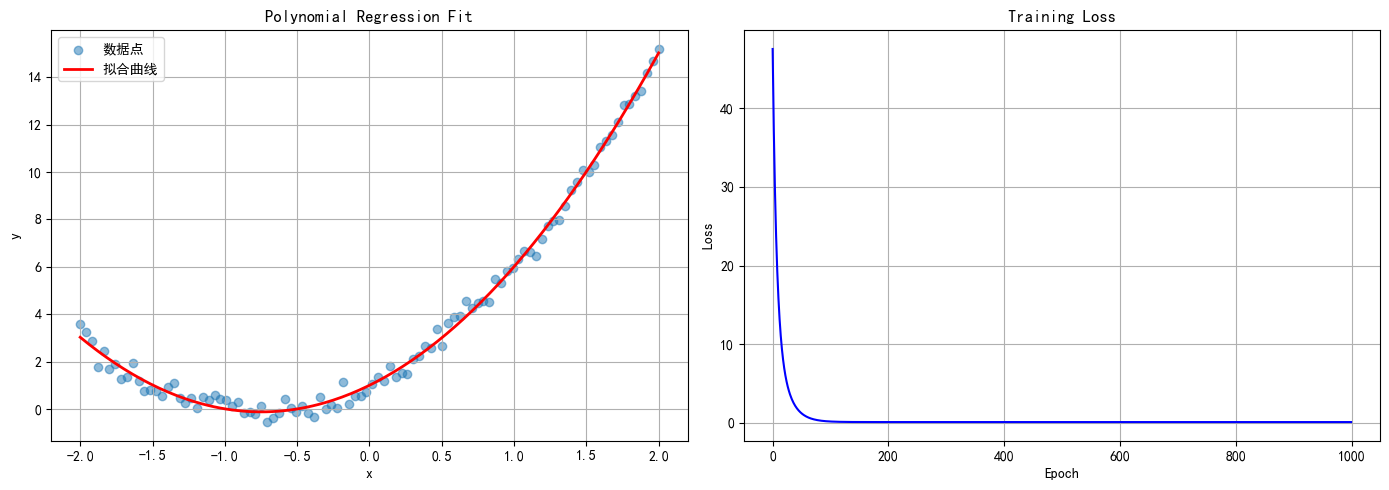

In [ ]:
#多项式回归
import torch
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 生成数据
torch.manual_seed(42)
X_raw = torch.linspace(-2, 2, 100).reshape(-1, 1)
y = 2 * X_raw**2 + 3 * X_raw + 1 + torch.randn(100, 1) * 0.3

# 特征工程：[x, x^2]
X = torch.cat([X_raw, X_raw**2], dim=1)  # (100, 2)

# 初始化参数
w = torch.randn(2, 1, requires_grad=True)  # [w1, w2]
b = torch.zeros(1, 1, requires_grad=True)

# 训练
learning_rate = 0.01
n_epochs = 1000
losses = []

for epoch in range(n_epochs):
    y_pred = X @ w + b
    loss = ((y_pred - y) ** 2).mean()
    
    loss.backward()
    
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
        w.grad.zero_()
        b.grad.zero_()
    
    losses.append(loss.item())

# 结果
print(f"真实参数: a=2, b=3, c=1")
print(f"学到的参数: a={w[1].item():.4f}, b={w[0].item():.4f}, c={b.item():.4f}")

# 可视化
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 子图1：拟合曲线
axes[0].scatter(X_raw.numpy(), y.numpy(), alpha=0.5, label='数据点')
X_plot = torch.linspace(-2, 2, 200).reshape(-1, 1)
X_plot_feat = torch.cat([X_plot, X_plot**2], dim=1)
y_plot = (X_plot_feat @ w + b).detach()
axes[0].plot(X_plot.numpy(), y_plot.numpy(), 'r-', linewidth=2, label='拟合曲线')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('Polynomial Regression Fit')
axes[0].legend()
axes[0].grid(True)

# 子图2：Loss曲线
axes[1].plot(losses, color='blue')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('Training Loss')
axes[1].grid(True)

plt.tight_layout()
plt.show()
